# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scipy==1.11.4

In [ ]:
!pip install scikit-plot

In [ ]:
import scipy

In [ ]:
scipy.__version__

In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2

## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [6]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
######################################################
###################### TO DO #########################
######################################################
df.describe()
######################################################
######################################################
######################################################

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


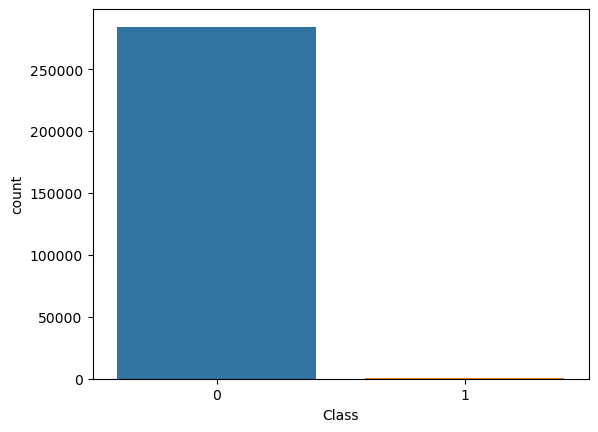

In [7]:
# ### 2.2 Class Distribution
# Visualize the class distribution
######################################################
###################### TO DO #########################
######################################################
plt.figure()
sns.countplot(df, x="Class")
plt.show()
######################################################
######################################################
######################################################

In [8]:
# Display the class distribution in percentages
######################################################
###################### TO DO #########################
######################################################
print("Class Distribution:")
y.value_counts(normalize=True) * 100
######################################################
######################################################
######################################################

Class Distribution:


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

<Figure size 640x480 with 0 Axes>

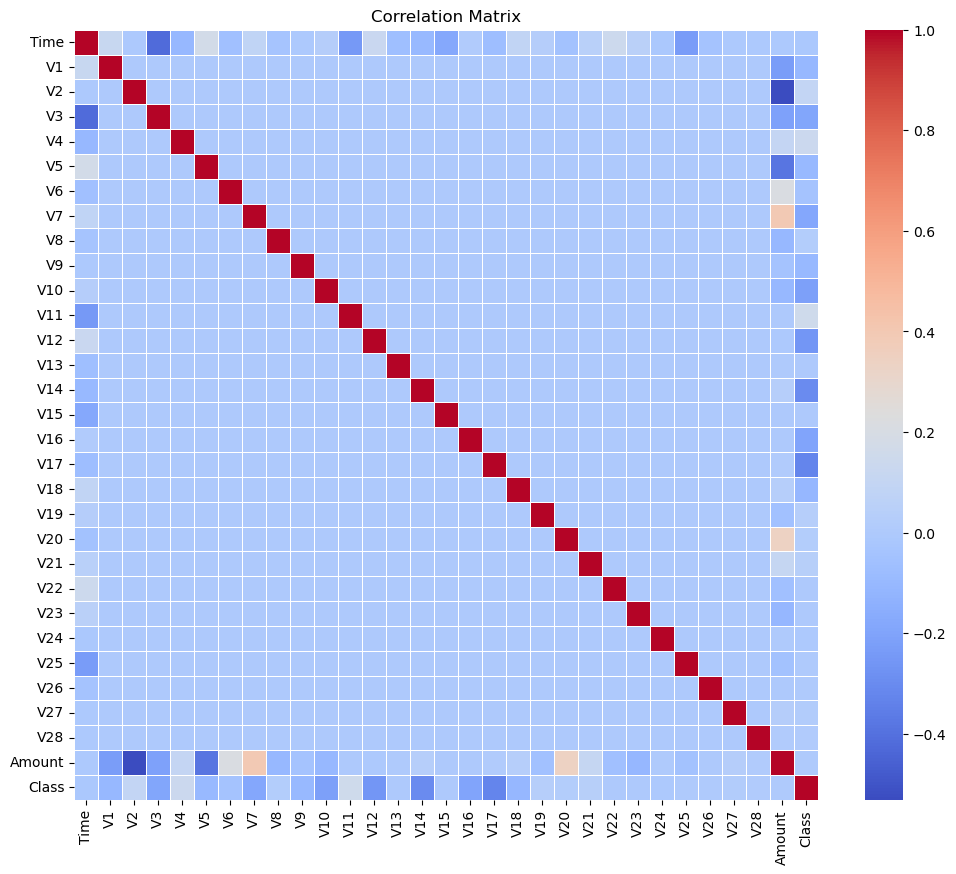

In [9]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
######################################################
###################### TO DO #########################
######################################################
plt.figure()
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
######################################################
######################################################
######################################################

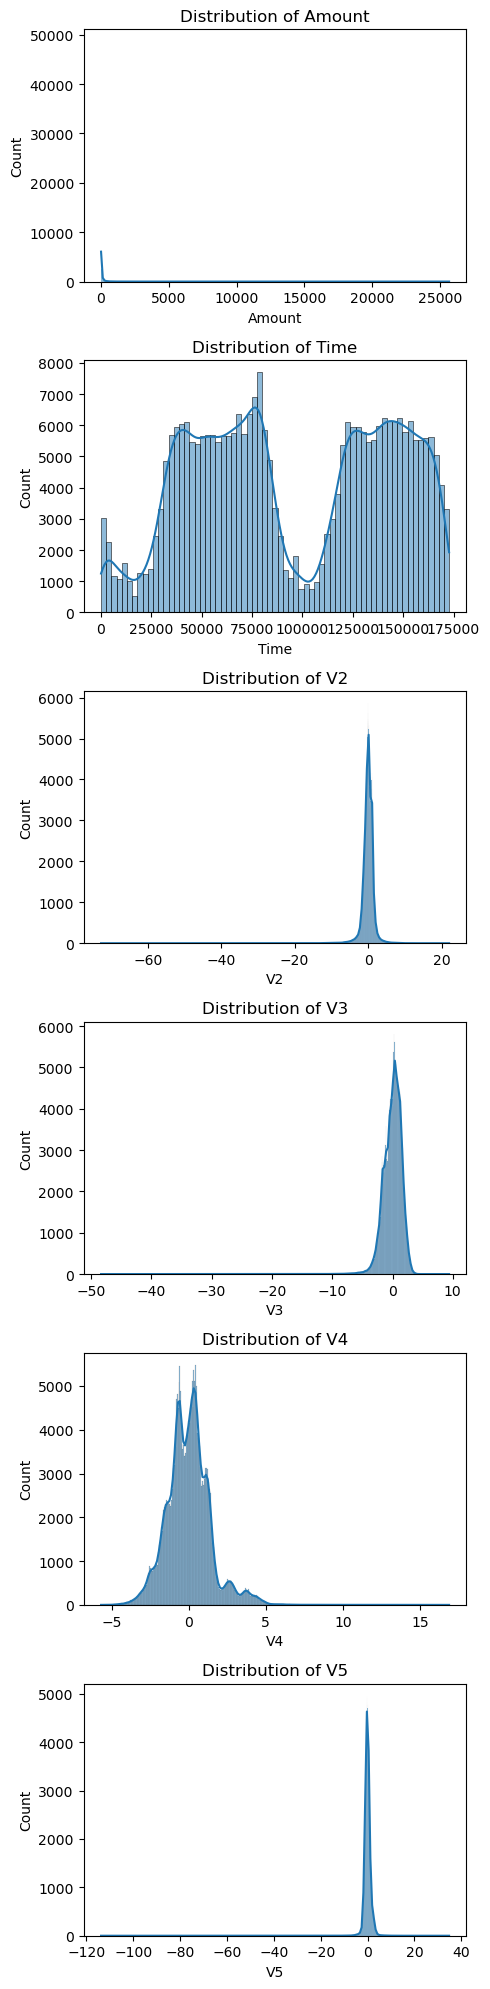

In [10]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
######################################################
###################### TO DO #########################
######################################################
features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']

plt.figure(figsize=(5, 20))
for i, column in enumerate(features, 1):
  plt.subplot(6, 1, i)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel("Count")
plt.tight_layout()
plt.show()
######################################################
######################################################
######################################################

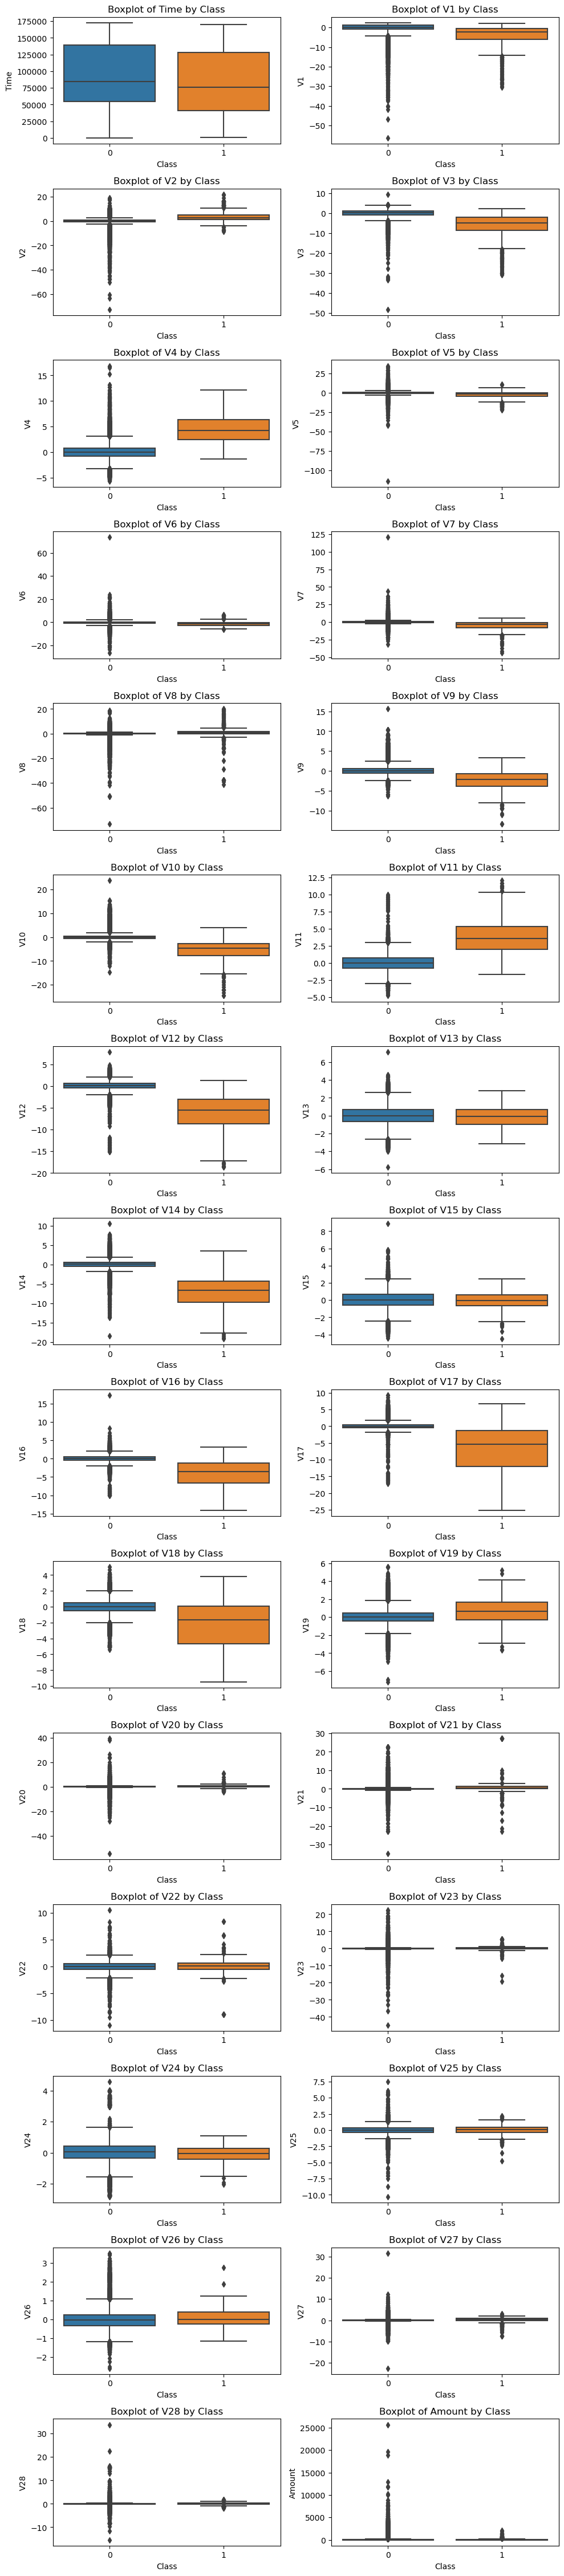

In [11]:
##########################################################
### You can add more creative analysis to learn more...###
##########################################################
features = [col for col in df.columns if col != 'Class']

plt.figure(figsize=(10, len(df.columns)*3))
for i, column in enumerate(features, 1):
  plt.subplot(len(df.columns), 2, i)
  sns.boxplot(x=df['Class'], y=df[column])
  plt.title(f"Boxplot of {column} by Class")
  plt.xlabel('Class')
  plt.ylabel(column)
plt.tight_layout()
plt.show()
##########################################################
##########################################################
##########################################################

In [12]:
def detect_outliers_iqr(df, feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound= Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
  return len(outliers)/len(df)*100

In [13]:
outlier_percentages = {feature: detect_outliers_iqr(df, feature) for feature in features}
outlier_percentages_1 = {feature: detect_outliers_iqr(df[df['Class'] == 1], feature) for feature in features}
outlier_percentages_0 = {feature: detect_outliers_iqr(df[df['Class'] == 0], feature) for feature in features}

In [14]:
def plot_outlier_percentages(axes, percentages, title, color):
    axes.bar(list(percentages.keys()), list(percentages.values()), color=color)
    axes.set_title(title)
    axes.set_xlabel('Features')
    axes.tick_params(axis='x', rotation=90)

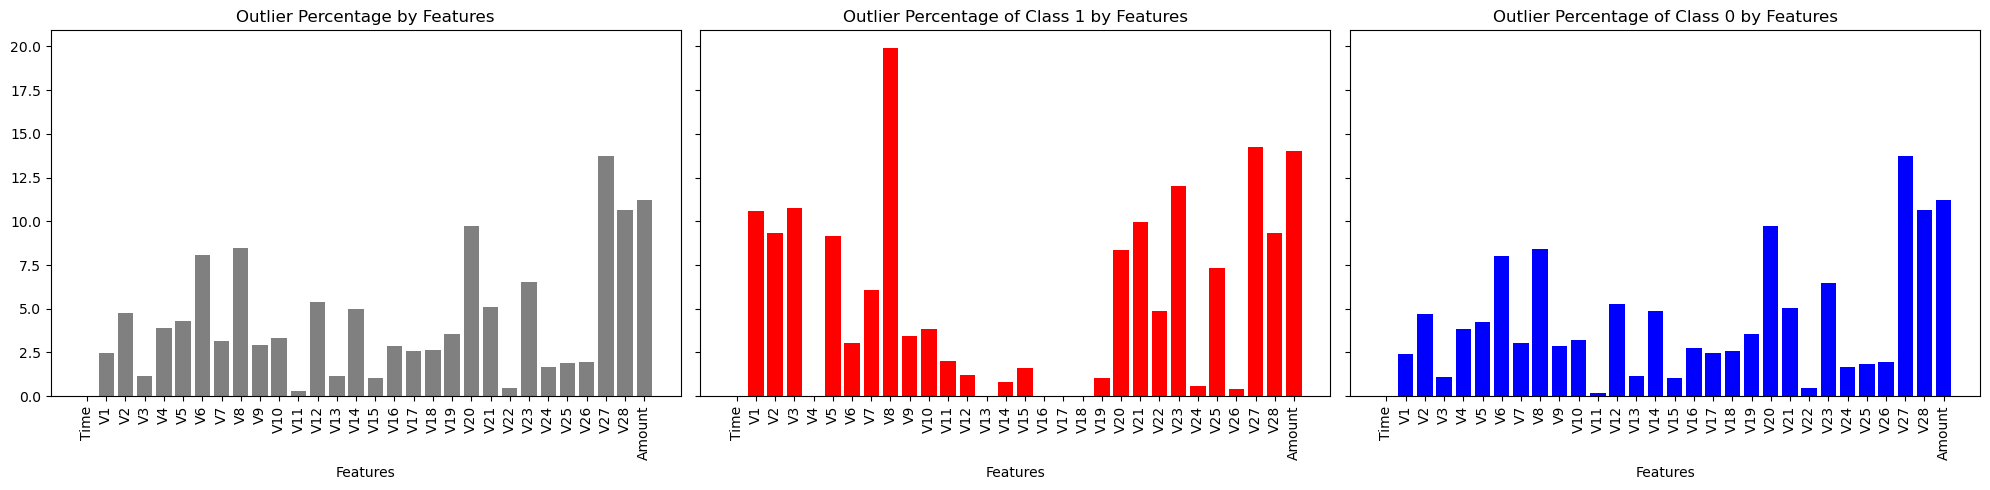

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

plot_outlier_percentages(axes[0], outlier_percentages, 'Outlier Percentage by Features', 'gray')
plot_outlier_percentages(axes[1], outlier_percentages_1, 'Outlier Percentage of Class 1 by Features', 'red')
plot_outlier_percentages(axes[2], outlier_percentages_0, 'Outlier Percentage of Class 0 by Features', 'blue')

plt.tight_layout()
plt.show()

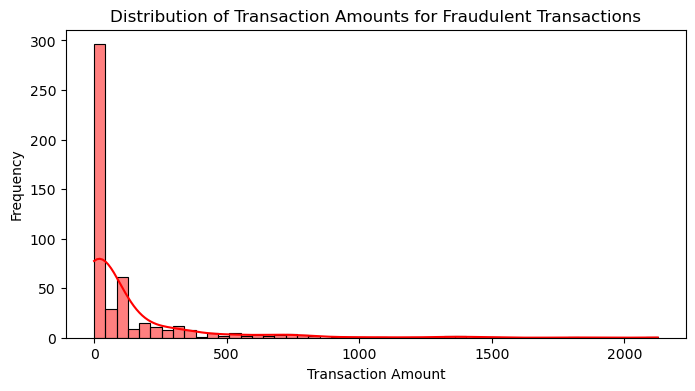

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', kde=True)
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

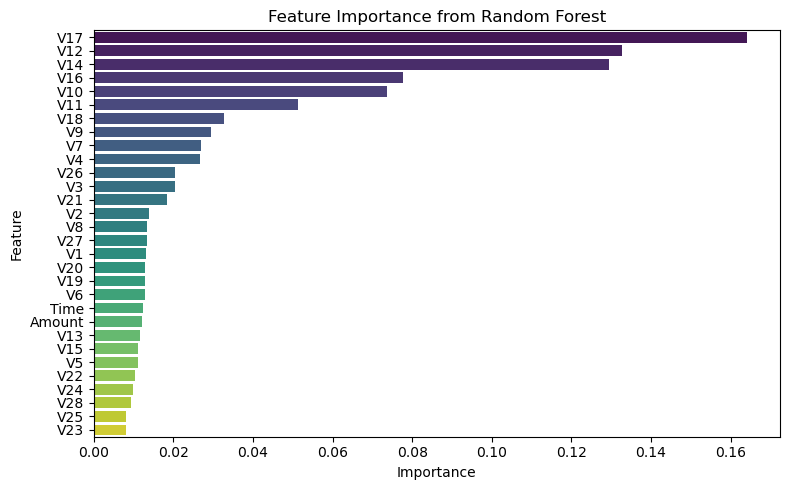

In [19]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

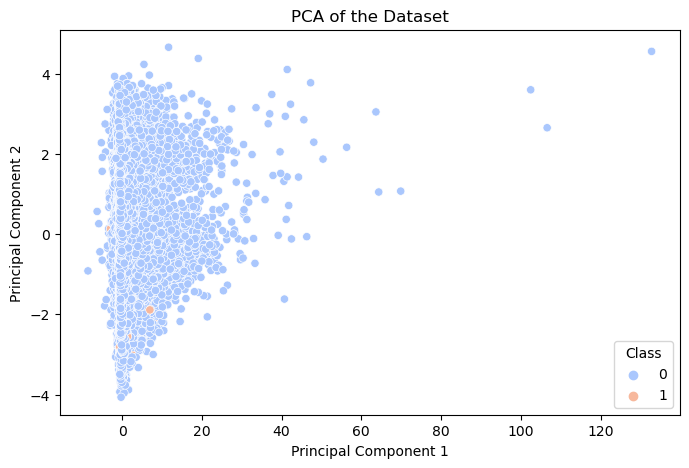

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.legend(title='Class')
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  
  1. Major Challenges:
        1. Extremely imbalanced data which can lead to models that are biased towards the majority class. Should be balanced using oversampling the minority class, undersampling the majority class or a combination of both,
        2. Number of outliers in some columns including `V27`, `V28` and `Amount` is high. Positive class is also prone to outliers which can complicate the task of identifying fraudulent activity because outliers can skew the analysis and make it harder to set appropriate thresholds.
        3. Features have a wide range of values, including negative numbers. This can make it difficult to interpret and normalize the data effectively.
        4. Many features do not follow a normal distribution and may be skewed.
        5. There is not a visibly high correlation between the features and the target variable (`Class`).
      
  2. Analyzing the correlation matrix:

        The correlation matrix shows that `Time`, `Amount`, and `Class` have the strongest relationships. Specifically, `Class` is negatively correlated with `V16`, `V17`, and `V14`, meaning these features are more common in non-fraudulent transactions. `Amount` is positively linked to `V7` and `V20`, but negatively linked to `V2` and `V5`, showing how transaction amounts relate to other features. Each feature perfectly correlates with itself, which confirms the matrix is accurate.

  3. Is your data linearly separable?
  
        No, the data is not linearly separable. This conclusion is drawn from the PCA analysis, which shows that even after reducing the dataset to two principal components, the classes do not exhibit clear and distinct separation. The plot indicates that Class 1 is not easily distinguishable from Class 0, suggesting that a linear decision boundary would not effectively separate the two classes.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


### Feature Selection

In [22]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################
threshold = 0.015
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

print("Selected features based on threshold:")
print(*selected_features)
##########################################################
##########################################################
##########################################################

Selected features based on threshold:
V17 V12 V14 V16 V10 V11 V18 V9 V7 V4 V26 V3 V21


In [8]:
selected_features = ['V17',
 'V12',
 'V14',
 'V16',
 'V10',
 'V11',
 'V18',
 'V9',
 'V7',
 'V4',
 'V26',
 'V3',
 'V21']

### Scaler robust to outliers

In [9]:
######################################################
###################### TO DO #########################
######################################################
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])
######################################################
######################################################
######################################################

### Oversampling using SMOTE

In [10]:
######################################################
###################### TO DO #########################
######################################################
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f'Original class distribution:\n{y.value_counts()}')
print(f'Class distribution after SMOTE:\n{pd.Series(y_train_smote).value_counts()}')
######################################################
######################################################
######################################################

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Class distribution after SMOTE:
Class
0    199008
1    199008
Name: count, dtype: int64


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

### Preprocessed Data

In [26]:
model = LogisticRegression(max_iter=10000)

In [27]:
######################################################
###################### TO DO #########################
######################################################
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_scaled)

print("\nLogistic Regression Preprocessed Data Classification Report:")
print(classification_report(y_test, y_pred))
######################################################
######################################################
######################################################


Logistic Regression Preprocessed Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



Logistic Regression Preprocessed Data Confusion Matrix:



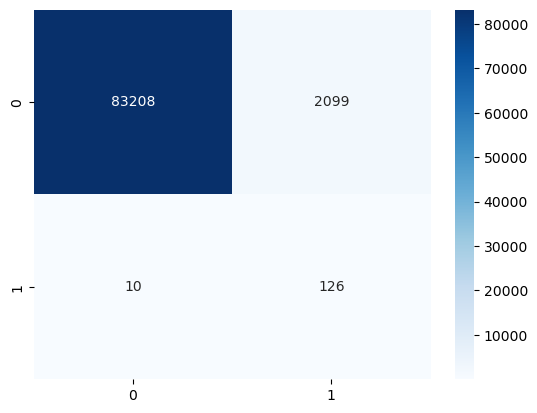

In [28]:
print("Logistic Regression Preprocessed Data Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues', fmt='g')
plt.show()

#### k-Fold Cross-Validation


In [29]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5)

cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall')

print(f"Cross-validated accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-validated precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Cross-validated recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")

Cross-validated accuracy: 0.9963 ± 0.0057
Cross-validated precision: 0.7475 ± 0.3141
Cross-validated recall: 0.5511 ± 0.2131


In [30]:
print("Accuracy for each fold:")
for i, acc in enumerate(cv_accuracy, 1):
    print(f"Fold {i}: {acc:.4f}")

print("\nPrecision for each fold:")
for i, prec in enumerate(cv_precision, 1):
    print(f"Fold {i}: {prec:.4f}")

print("\nRecall for each fold:")
for i, rec in enumerate(cv_recall, 1):
    print(f"Fold {i}: {rec:.4f}")

Accuracy for each fold:
Fold 1: 0.9850
Fold 2: 0.9991
Fold 3: 0.9990
Fold 4: 0.9993
Fold 5: 0.9992

Precision for each fold:
Fold 1: 0.1486
Fold 2: 0.9714
Fold 3: 0.8902
Fold 4: 0.7273
Fold 5: 1.0000

Recall for each fold:
Fold 1: 0.9427
Fold 2: 0.4048
Fold 3: 0.6134
Fold 4: 0.4211
Fold 5: 0.3733


### Original Data

In [31]:
model_2 = LogisticRegression(max_iter=10000)

In [32]:
model_2.fit(X_train, y_train)
y_pred_original = model_2.predict(X_test)

print("Original Data Classification Report:")
print(classification_report(y_test, y_pred_original))

Original Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.61      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Original Data Confusion Matrix:



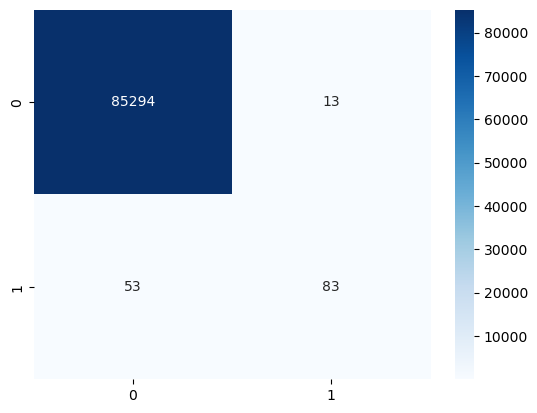

In [33]:
print("Original Data Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm,annot=True, cmap='Blues', fmt='g')
plt.show()

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

#### Original Data


SVM Original Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

SVM Original Data Confusion Matrix:



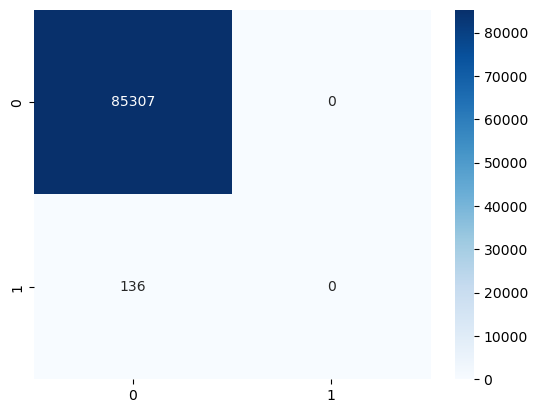

In [34]:
######################################################
###################### TO DO #########################
######################################################
model_4 = SVC()

model_4.fit(X_train, y_train)
y_pred_original = model_4.predict(X_test)

print("\nSVM Original Data Classification Report:")
print(classification_report(y_test, y_pred))

print("SVM Original Data Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm,annot=True, cmap='Blues', fmt='g')
plt.show()
######################################################
######################################################
######################################################

#### Preprocessed Data

In [35]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
model_3 = SVC()

model_3.fit(X_train_smote, y_train_smote)
y_pred = model_3.predict(X_test_scaled)

print("\nSVM Preprocessed Data Classification Report:")
print(classification_report(y_test, y_pred))
###################################################################################
###################################################################################
###################################################################################


SVM Preprocessed Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.92      0.12       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



SVM Preprocessed Confusion Matrix:



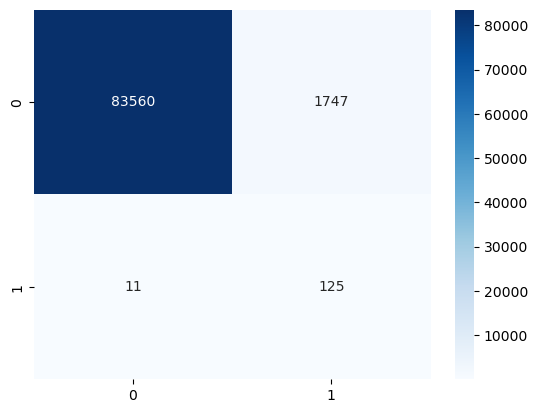

In [36]:
print("SVM Preprocessed Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues', fmt='g')
plt.show()

#### Using GridSearchCV for Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.997 total time=66.3min
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=0.997 total time=123.3min


## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:** 
  
1. Comparison of SVM vs Logistic Regression: 

Logistic Regression on the original data outperforms SVM, offering a better balance between precision (0.86) and recall (0.61), resulting in a higher F1-score (0.72). SVM, while achieving high recall (0.93), suffers from low precision (0.06), leading to a poor F1-score (0.11), making Logistic Regression generally the better model. Our data wasn't linearly seperable according to previous question, which makes sense why logistic regression did better than SVM generally, but after preprocessing steps they had similar results.

2. Suitability of Accuracy as a Metric:

Accuracy is unsuitable for this highly imbalanced fraud detection problem, as it could be misleadingly high if the model predominantly predicts the majority class (non-fraudulent transactions). Recall would be more appropriate metric to evaluate the model's performance on detecting the minority class.

3. Recommendations for Enhancing Recall: 

To improve recall, we can use oversampling techniques like SMOTE that we did, adjust decision thresholds to favor recall, consider cost-sensitive learning to penalize false negatives, and explore models like SVM or ensemble methods that can be tuned for higher recall. Or we can just collect more data for the positive class if possible.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

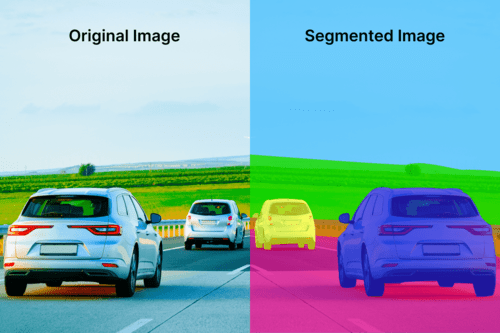

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg

  0% 0.00/36.2k [00:00<?, ?B/s]
100% 36.2k/36.2k [00:00<00:00, 66.7MB/s]


In [16]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


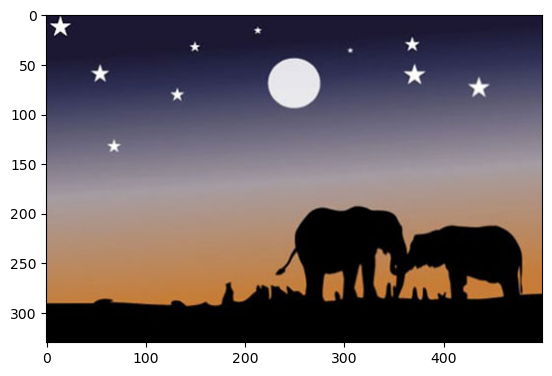

In [17]:
plt.imshow(im) # as RGB Format
plt.show()

In [18]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








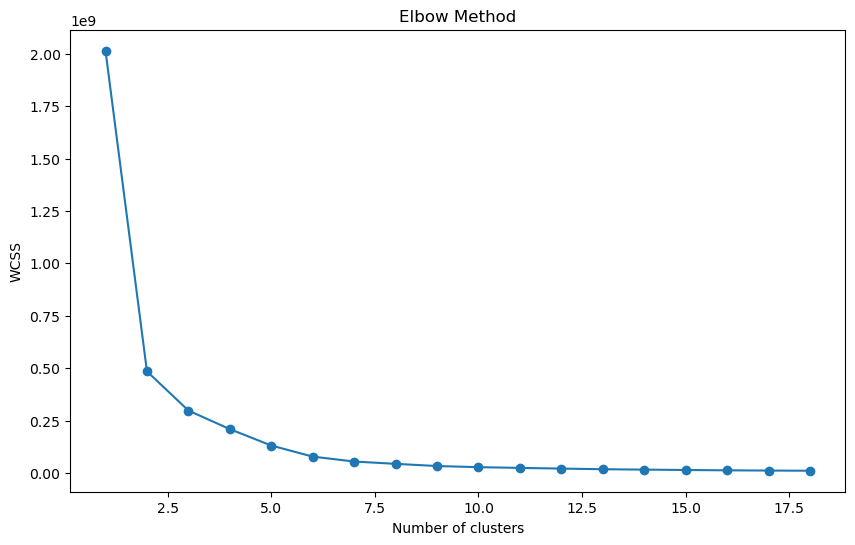

In [19]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 19), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Visualize Dominant Color

In [22]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
dominant_colors = kmeans.cluster_centers_
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

KMeans(n_clusters=6, random_state=42)

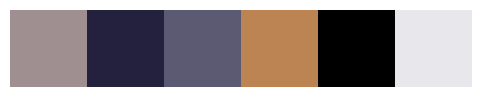

In [31]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
plt.figure(figsize=(7, 1))
plt.imshow([dominant_colors.astype(int)])
plt.axis('off')
plt.show()
######################################################
######################################################
######################################################

## Segmenting original image

In [32]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


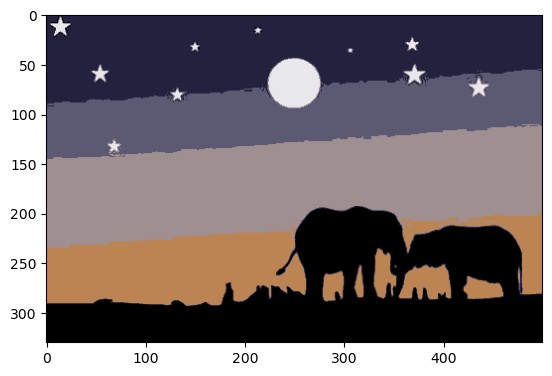

In [33]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()